In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns
from metpy.calc import dewpoint_from_relative_humidity
from metpy.calc import specific_humidity_from_dewpoint
from metpy.units import units
import dask

/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
########################################################################################## read er5 data #################################################################################################################################

In [15]:
ds_era5_JJ = xr.open_dataset('/home/kit/imk-tro/gj5173/ai-models/data/era5_2021-JJ.nc')

In [16]:
ds_era5_JJ_rh = ds_era5_JJ['var157']
ds_era5_JJ_T = ds_era5_JJ['var130']


In [17]:
#extract longitude from -135w ro -105w
ds_era5_JJ_T.lon[900:1021]

<xarray.DataArray 'lon' (lon: 121)>
array([225.  , 225.25, 225.5 , 225.75, 226.  , 226.25, 226.5 , 226.75, 227.  ,
       227.25, 227.5 , 227.75, 228.  , 228.25, 228.5 , 228.75, 229.  , 229.25,
       229.5 , 229.75, 230.  , 230.25, 230.5 , 230.75, 231.  , 231.25, 231.5 ,
       231.75, 232.  , 232.25, 232.5 , 232.75, 233.  , 233.25, 233.5 , 233.75,
       234.  , 234.25, 234.5 , 234.75, 235.  , 235.25, 235.5 , 235.75, 236.  ,
       236.25, 236.5 , 236.75, 237.  , 237.25, 237.5 , 237.75, 238.  , 238.25,
       238.5 , 238.75, 239.  , 239.25, 239.5 , 239.75, 240.  , 240.25, 240.5 ,
       240.75, 241.  , 241.25, 241.5 , 241.75, 242.  , 242.25, 242.5 , 242.75,
       243.  , 243.25, 243.5 , 243.75, 244.  , 244.25, 244.5 , 244.75, 245.  ,
       245.25, 245.5 , 245.75, 246.  , 246.25, 246.5 , 246.75, 247.  , 247.25,
       247.5 , 247.75, 248.  , 248.25, 248.5 , 248.75, 249.  , 249.25, 249.5 ,
       249.75, 250.  , 250.25, 250.5 , 250.75, 251.  , 251.25, 251.5 , 251.75,
       252.  , 252.25, 252.5 , 252.75, 253.  , 253.25, 253.5 , 253.75, 254.  ,
       254.25, 254.5 , 254.75, 255.  ], dtype=float32)
Coordinates:
  * lon      (lon) float32 225.0 225.2 225.5 225.8 ... 254.2 254.5 254.8 255.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [18]:
ds_era5_JJ_T_landbox = ds_era5_JJ_T[:,:,164:123:-1,940:981] #area from 49N-59N,115W-125W
ds_era5_JJ_T_landbox_mean = np.mean(ds_era5_JJ_T[:,:,164:123:-1,940:981],axis=(-1,-2))
ds_era5_JJ_T_landbox_latmean = np.mean(ds_era5_JJ_T[:,:,164:123:-1,940:981],axis=-2)

In [19]:
ds_era5_JJ_T_landbox_lattimemean=np.mean(ds_era5_JJ_T[13:18,:,164:123:-1,900:1021],axis=(0,-2))

In [20]:
ds_era5_JJ_rh_landbox = ds_era5_JJ_rh[:,:,164:123:-1,940:981] #area from 49N-59N,115W-125W
ds_era5_JJ_rh_landbox_mean = np.mean(ds_era5_JJ_rh[:,:,164:123:-1,940:981],axis=(-1,-2))

In [21]:
ds_era5_JJ_rh_landbox_lattimemean = np.mean(ds_era5_JJ_rh[13:18,:,164:123:-1,900:1021],axis=(-2,0))

In [22]:
#convert the relative humidity to specific humidity
#ds_era5_JJ_dp_landbox_mean = dewpoint_from_relative_humidity((ds_era5_JJ_T_landbox_mean) * units.K, ds_era5_JJ_rh_landbox_mean * units.percent)
ds_era5_JJ_dp_landbox_mean = dewpoint_from_relative_humidity(ds_era5_JJ_T_landbox_mean * units.kelvin, ds_era5_JJ_rh_landbox_mean * units.percent)

In [23]:
ds_era5_JJ_dp_landbox_lattimemean = dewpoint_from_relative_humidity(ds_era5_JJ_T_landbox_lattimemean * units.kelvin, ds_era5_JJ_rh_landbox_lattimemean * units.percent)

In [24]:
ds_era5_JJ_dp_landbox_mean

<xarray.DataArray (time: 22, plev: 13)>
<Quantity([[-86.04593    -82.26283    -78.17236    -64.72092    -53.186554
  -45.310394   -32.849      -22.627457   -11.788544    -3.3876953
    2.8891296    6.344055    10.2872925 ]
 [-86.01965    -81.778625   -77.69418    -64.14914    -53.082245
  -44.16281    -30.31871    -23.047623   -11.792358    -2.9532166
    4.9305115    8.576508    12.531067  ]
 [-85.942535   -82.28027    -79.90999    -69.32611    -56.774292
  -48.560196   -34.288498   -23.694122   -13.78598     -5.246887
    4.4019165    8.388214    12.664001  ]
 [-85.961365   -82.52438    -79.1315     -70.45697    -55.287537
  -46.97377    -32.982666   -24.096954   -16.097137    -6.9838867
    0.6838684    4.60614      8.636566  ]
 [-85.921524   -82.37048    -79.02008    -64.6669     -53.384186
  -44.742508   -30.842361   -21.672775   -12.81189     -5.0052185
    2.3084106    5.8394165    9.664734  ]
 [-85.88811    -82.32396    -79.018005   -61.570236   -53.64911
  -45.884003   -31.852707   -21.740356   -12.65741     -5.7264404
    3.0844727    6.4892883   10.251373  ]
 [-85.92537    -82.193146   -73.233826   -66.113495   -55.691162
  -48.3201     -36.0735     -24.673157   -13.985931    -5.1894836
...
  -46.42798    -32.858032   -20.817734    -9.227661     1.7507324
    9.70813     12.189728    15.756195  ]
 [-85.98421    -81.87659    -73.82071    -60.735413   -51.710464
  -48.124283   -38.71086    -24.994354    -9.077606    -1.0323792
    8.473663    11.268372    14.746063  ]
 [-85.98773    -81.747406   -75.282745   -59.003784   -49.47368
  -43.184708   -32.813934   -17.290009    -6.4074707   -0.6798401
   11.782074    14.601532    18.12088   ]
 [-85.923355   -82.00232    -75.81531    -58.62996    -49.45482
  -41.310608   -31.248184   -20.43428     -8.116547     2.2140198
   12.797699    15.875305    19.757172  ]
 [-85.91226    -82.18483    -76.07521    -60.402283   -50.562195
  -41.86064    -28.79921    -23.515335   -14.218353    -2.3096008
    7.1744385   10.681732    14.406921  ]
 [-85.9115     -82.07976    -76.91998    -66.679794   -54.908386
  -43.961792   -31.83934    -19.462234    -9.094147    -1.1597595
    6.888275     9.88205     13.49411   ]
 [-85.910736   -82.13144    -77.15918    -65.17293    -53.5195
  -45.788025   -33.04953    -21.725464   -11.688965    -3.3087769
    6.2425537    9.205048    12.879578  ]], 'degree_Celsius')>
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14 2021-06-15 ... 2021-07-05
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05

In [25]:
specific_humidity_from_dewpoint(988 * units.hPa, 15 * units.degC).to('g/kg')

10.797582795554245 <Unit('gram / kilogram')>

In [26]:
a=ds_era5_JJ_dp_landbox_mean.plev/100 * units.hPa
b=ds_era5_JJ_dp_landbox_mean 

In [27]:
ds_era5_JJ_sh_landbox_mean = specific_humidity_from_dewpoint(a,b)

In [15]:
ds_era5_JJ_sh_landbox_lattimemean = specific_humidity_from_dewpoint(ds_era5_JJ_dp_landbox_lattimemean.plev/100 * units.hPa,ds_era5_JJ_dp_landbox_lattimemean)

In [16]:
ds_era5_JJ_sh_landbox_lattimemean

Magnitude,[[4.936388417801595e-06 4.935334154321532e-06 4.933747543665368e-06 ... 5.01404815170481e-06 5.015320718627831e-06 5.017095457748877e-06] [5.240838160648289e-06 5.225337129104383e-06 5.208873849276781e-06 ... 4.895140639538389e-06 4.906156761109956e-06 4.918688339981433e-06] [7.656289007586503e-06 7.739901198909887e-06 7.81349425942887e-06 ... 8.664568200707798e-06 8.552204322161192e-06 8.439063603791948e-06] ... [0.00400719714763023 0.004058059517920969 0.0041201496748689646 ... 0.00815820891692625 0.00817509173793807 0.00817405685960443] [0.00579405906013136 0.005766572004818945 0.0057893291977942915 ... 0.00852372857204905 0.008582451111539983 0.008613506528436425] [0.007861921721502359 0.007915288121369634 0.007956734907348197 ... 0.009860133987718036 0.009960591843562981 0.01004240272345147]]
Units,dimensionless


In [12]:
ds_era5_JJ_sh_landbox_mean.plev[10:13]

<xarray.DataArray 'plev' (plev: 3)>
array([ 85000.,  92500., 100000.])
Coordinates:
  * plev     (plev) float64 8.5e+04 9.25e+04 1e+05
Attributes:
    standard_name:  air_pressure
    positive:       down
    axis:           Z

In [52]:
ds_era5_JJ_sh_landbox_mean.time

<xarray.DataArray 'time' (time: 22)>
array(['2021-06-14T00:00:00.000000000', '2021-06-15T00:00:00.000000000',
       '2021-06-16T00:00:00.000000000', '2021-06-17T00:00:00.000000000',
       '2021-06-18T00:00:00.000000000', '2021-06-19T00:00:00.000000000',
       '2021-06-20T00:00:00.000000000', '2021-06-21T00:00:00.000000000',
       '2021-06-22T00:00:00.000000000', '2021-06-23T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-06-25T00:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-03T00:00:00.000000000',
       '2021-07-04T00:00:00.000000000', '2021-07-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14 2021-06-15 ... 2021-07-05
Attributes:
    standard_name:  time
    axis:           T

In [ ]:
########################################################## time-level sh plot ####################################################################

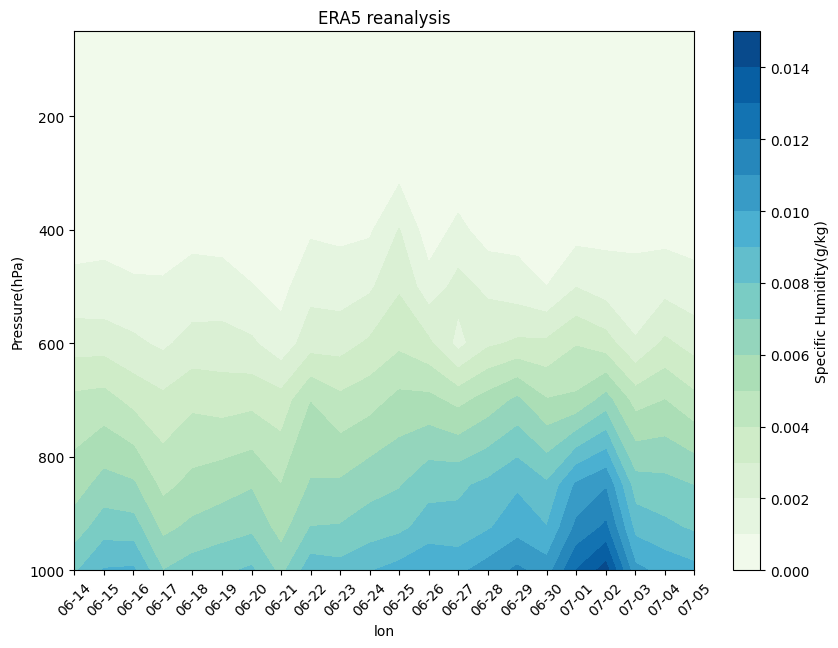

In [189]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 7))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times= ds_era5_JJ_sh_landbox_mean  .time # datetime array
levels = ds_era5_JJ_sh_landbox_mean  .plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_era5_JJ_sh_landbox_mean.T   # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Specific Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Labels and title
ax.set_xlabel('lon')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/sh_era.png', bbox_inches='tight',dpi=200)
plt.show()

In [ ]:
########################################################## lon-level sh plot ####################################################################

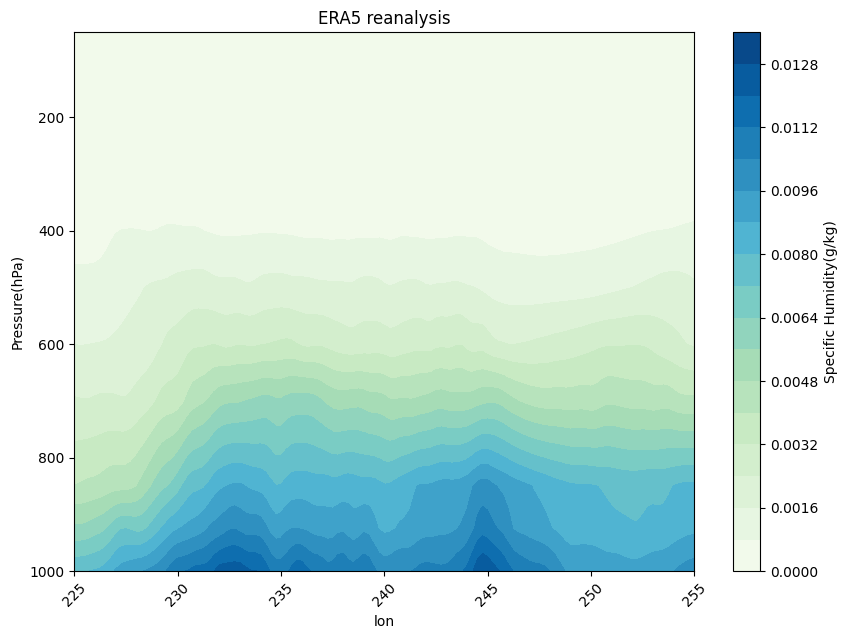

In [173]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 7))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
lon= ds_era5_JJ_sh_landbox_lattimemean  .lon # datetime array
levels = ds_era5_JJ_sh_landbox_lattimemean  .plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(lon, levels)
Z = ds_era5_JJ_sh_landbox_lattimemean   # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Specific Humidity(g/kg)')

# Set x-axis major locator and formatter for dates


# Labels and title
ax.set_xlabel('lon')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
############################################# level-time rh ################################################################################

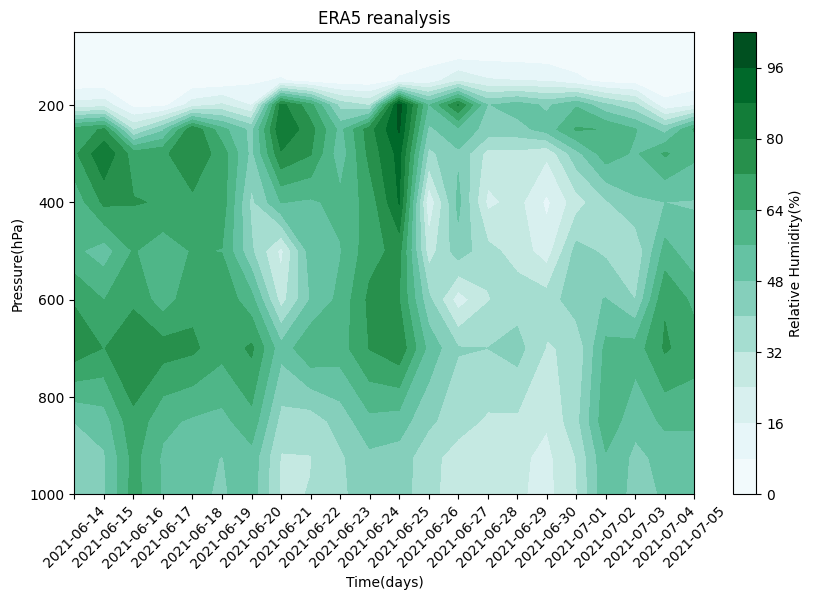

In [141]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_era5_JJ_rh_landbox_mean.time  # datetime array
levels = ds_era5_JJ_rh_landbox_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_era5_JJ_rh_landbox_mean.T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='BuGn',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Relative Humidity(%)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [9]:
################ load the climatology of specific humidity ###################################

levels = [10000, 20000,25000,30000,40000,50000,60000,70000,80000,85000,90000]
base_pattern = '/home/kit/imk-tro/gj5173/tmp/clim_Q{level}_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point'
datasets = []

for level in levels:
    filename = base_pattern.format(level=level)  
    ds = xr.open_dataset(filename,engine='netcdf4')
    datasets.append(ds)

ds_clim_Q_100_900 = xr.concat(datasets, dim='plev')


/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [10]:
ds = xr.open_dataset('/home/kit/imk-tro/gj5173/tmp/clim_Q85000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point',engine='netcdf4')

In [11]:
ds

<xarray.Dataset>
Dimensions:  (lon: 240, lat: 110)
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 25.0 25.5 26.0 26.5 27.0 ... 77.5 78.0 78.5 79.0 79.5
    plev     float64 ...
Data variables:
    Q        (lat, lon) float32 ...

In [12]:
#extract from -130 to -105 degree
ds_clim_Q_100_900.Q[:,:,100:151]

<xarray.DataArray 'Q' (plev: 11, lat: 110, lon: 51)>
array([[[3.6017746e-06, 3.6176002e-06, 3.6343235e-06, ...,
         4.0803507e-06, 4.0670338e-06, 4.0832242e-06],
        [3.5832277e-06, 3.5982093e-06, 3.6151148e-06, ...,
         4.0550835e-06, 4.0468103e-06, 4.0534064e-06],
        [3.5620021e-06, 3.5766602e-06, 3.5929595e-06, ...,
         4.0454797e-06, 4.0302675e-06, 4.0253831e-06],
        ...,
        [2.5226486e-06, 2.5227509e-06, 2.5228337e-06, ...,
         2.5226641e-06, 2.5225968e-06, 2.5225111e-06],
        [2.5231977e-06, 2.5232907e-06, 2.5233535e-06, ...,
         2.5231293e-06, 2.5230663e-06, 2.5229976e-06],
        [2.5237036e-06, 2.5237960e-06, 2.5238637e-06, ...,
         2.5235709e-06, 2.5234704e-06, 2.5233703e-06]],

       [[2.4422017e-05, 2.4472500e-05, 2.4694633e-05, ...,
         5.9914233e-05, 5.8056754e-05, 5.5245917e-05],
        [2.3931188e-05, 2.3948875e-05, 2.4103700e-05, ...,
         5.7327958e-05, 5.4205113e-05, 5.0005739e-05],
        [2.3552451e-05, 2.3597411e-05, 2.3626069e-05, ...,
         5.5035278e-05, 5.0981344e-05, 4.7180336e-05],
...
        [2.7761692e-03, 2.7770612e-03, 2.7751573e-03, ...,
         2.6963204e-03, 2.6986338e-03, 2.6985456e-03],
        [2.7526992e-03, 2.7542091e-03, 2.7552778e-03, ...,
         2.6633823e-03, 2.6669577e-03, 2.6695880e-03],
        [2.7350187e-03, 2.7335631e-03, 2.7329072e-03, ...,
         2.6341786e-03, 2.6385416e-03, 2.6432003e-03]],

       [[6.4086854e-03, 6.2680240e-03, 6.1342060e-03, ...,
         1.0916306e-02, 9.4410982e-03, 9.4374120e-03],
        [6.2963679e-03, 6.1558466e-03, 6.0230657e-03, ...,
         9.5258188e-03, 8.9493925e-03, 8.8585950e-03],
        [6.1856345e-03, 6.0344446e-03, 5.8902819e-03, ...,
         8.8086380e-03, 8.8294009e-03, 8.6283963e-03],
        ...,
        [3.0503597e-03, 3.0509369e-03, 3.0481510e-03, ...,
         3.0078222e-03, 3.0102502e-03, 3.0132018e-03],
        [3.0359565e-03, 3.0363384e-03, 3.0354986e-03, ...,
         2.9931082e-03, 2.9985430e-03, 3.0013411e-03],
        [3.0166321e-03, 3.0160227e-03, 3.0150148e-03, ...,
         2.9511054e-03, 2.9549813e-03, 2.9591853e-03]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -130.0 -129.5 -129.0 -128.5 ... -106.0 -105.5 -105.0
  * lat      (lat) float32 25.0 25.5 26.0 26.5 27.0 ... 77.5 78.0 78.5 79.0 79.5
  * plev     (plev) float64 1e+04 2e+04 2.5e+04 3e+04 ... 8e+04 8.5e+04 9e+04

In [14]:
#compute the humidity anomaly of era5
ds_clim_Q_L9_landbox = ds_clim_Q_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(110,131))
ds_clim_Q_L9_landbox_105130 = ds_clim_Q_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(100,151))
ds_clim_Q_L9_landbox_mean = np.mean(ds_clim_Q_L9_landbox.Q,axis=(-1,-2))

ds_era5_sh_L9_landbox_mean = ds_era5_JJ_sh_landbox_mean[:,[1, 3, 4, 5, 6, 7, 8, 9, 10]]
ds_anomaly_Q_L9_landbox_mean = ds_era5_sh_L9_landbox_mean - ds_clim_Q_L9_landbox_mean.values


NameError: name 'ds_era5_JJ_sh_landbox_mean' is not defined

In [19]:
ds_clim_Q_L9_landbox_mean

<xarray.DataArray 'Q' (plev: 9)>
array([2.5415143e-06, 1.6587604e-05, 5.4053067e-05, 1.3374031e-04,
       4.5311355e-04, 1.0172188e-03, 2.0465527e-03, 3.7342566e-03,
       5.5490024e-03], dtype=float32)
Coordinates:
  * plev     (plev) float64 1e+04 2e+04 2.5e+04 3e+04 ... 6e+04 7e+04 8.5e+04

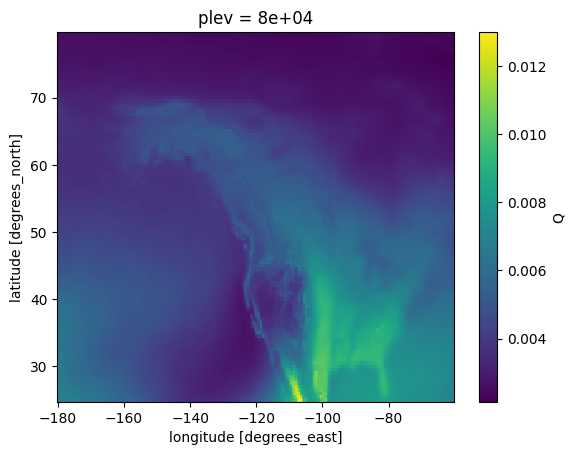

In [25]:
ds_clim_Q_100_900.Q[8].plot()

In [181]:
################################################# time level sh anomaly ######################################################################

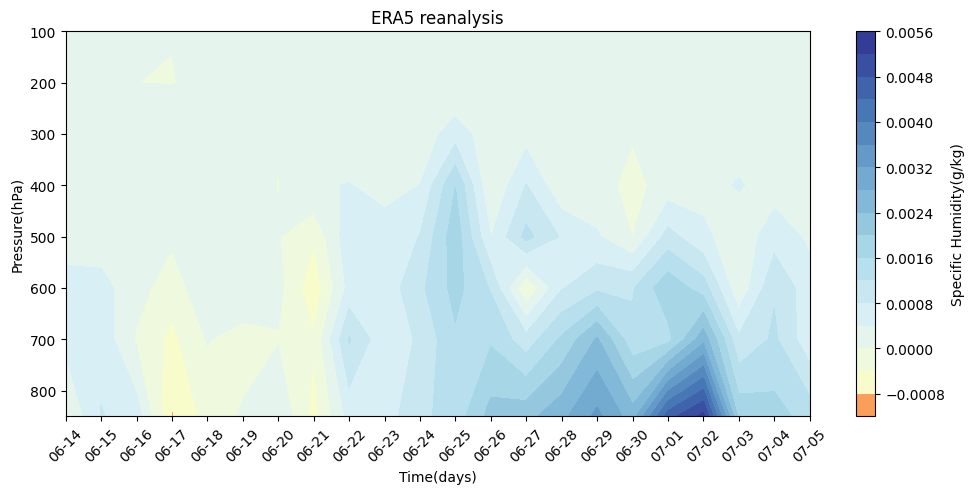

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 5))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_era5_JJ_rh_landbox_mean.time  # datetime array
levels = ds_clim_Q_L9_landbox.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_Q_L9_landbox_mean [:, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu_1,levels = 15)

# Add color bar
fig.colorbar(c, ax=ax, label='Specific Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/sh_era_anomaly_1.png', bbox_inches='tight',dpi=200)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_era5_JJ_rh_landbox_mean.time  # datetime array
levels = ds_clim_Q_L9_landbox.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_Q_L9_landbox_mean [:, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu,levels = 15)

# Add color bar
fig.colorbar(c, ax=ax, label='g/kg')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time(days)')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
############################################### fcn_ec cf###########################################################################################################

In [2]:
def read_fcnv2_forecast(date_str, dataset_type):
    # Define base directories and filename patterns based on dataset type
    base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
    if dataset_type == 'ec':
        filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m0.nc'
        dataset_directory = 'ifs'
    elif dataset_type == 'era':
        filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m0.nc'
        dataset_directory = 'era5'
    else:
        print(f"Invalid dataset type: {dataset_type}")
        return None

    # Construct the full path
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)

    # Check if the file exists
    if os.path.exists(file_path):
        # Read the dataset using xarray
        ds = xr.open_dataset(file_path, engine='netcdf4')
        return ds
    else:
        print(f"File not found: {file_path}")
        return None

In [3]:
#read data from 2021-06-14 to 2021-06-24
date_range = pd.date_range(start='2021-06-14', end='2021-06-29', freq='D')
ds_fcnv2_ec = []

for date in date_range:
    date_str = date.strftime('%Y-%m-%d')  # Convert datetime to string
    ds = read_fcnv2_forecast(date_str,'ec')
    if ds is not None:
        ds_fcnv2_ec.append(ds)

In [4]:
ds_fcnv2_ec[0]['r']

<xarray.DataArray 'r' (time: 60, plev: 13, lat: 721, lon: 1440)>
[809827200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14T06:00:00 ... 2021-06-29
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05
Attributes:
    standard_name:  relative_humidity
    long_name:      Relative humidity
    units:          %
    param:          1.1.0

In [22]:
ds_fcnv2_ec_cf_T_landbox_0614 = ds_fcnv2_ec[0].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0614_latmean = np.mean(ds_fcnv2_ec_cf_T_landbox_0614,axis=(-2))
ds_fcnv2_ec_cf_T_landbox_0614_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0614,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0616 = ds_fcnv2_ec[2].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0616_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0616,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0618 = ds_fcnv2_ec[4].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0618_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0618,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0620 = ds_fcnv2_ec[6].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0620_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0620,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0622 = ds_fcnv2_ec[8].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0622_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0622,axis=(-1,-2))

ds_fcnv2_ec_cf_T_landbox_0623 = ds_fcnv2_ec[9].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0623_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0623,axis=(-1,-2))

In [23]:
ds_fcnv2_ec_cf_T_landbox_0614_latmean

<xarray.DataArray 't' (time: 60, plev: 13, lon: 41)>
array([[[219.75958, 219.7212 , 219.65463, ..., 217.57172, 217.53746,
         217.51027],
        [223.22897, 223.11009, 223.00896, ..., 218.10204, 218.01663,
         217.9425 ],
        [226.25165, 226.15794, 226.07834, ..., 221.38626, 221.28525,
         221.17603],
        ...,
        [282.14566, 282.39307, 282.72046, ..., 289.68344, 289.95566,
         290.26547],
        [286.64505, 286.83823, 287.11066, ..., 294.16107, 294.38104,
         294.6603 ],
        [291.05322, 291.24908, 291.52563, ..., 298.94183, 299.146  ,
         299.44406]],

       [[219.15417, 219.11053, 219.04572, ..., 217.4352 , 217.39708,
         217.36081],
        [222.91852, 222.7922 , 222.67757, ..., 217.93286, 217.83682,
         217.74721],
        [226.71332, 226.62138, 226.5423 , ..., 221.18573, 221.07457,
         220.9673 ],
...
        [282.3471 , 282.53033, 282.7253 , ..., 286.3131 , 286.22134,
         286.1195 ],
        [287.11343, 287.3501 , 287.6123 , ..., 291.58188, 291.543  ,
         291.4774 ],
        [291.27298, 291.4919 , 291.77527, ..., 295.6934 , 295.6725 ,
         295.61655]],

       [[221.5514 , 221.50433, 221.5034 , ..., 221.80444, 221.8328 ,
         221.85207],
        [221.1739 , 221.0971 , 221.08492, ..., 219.78784, 219.78572,
         219.78812],
        [225.90134, 225.85815, 225.8313 , ..., 223.85245, 223.78609,
         223.73254],
        ...,
        [282.82104, 282.98227, 283.1591 , ..., 286.8196 , 286.7769 ,
         286.73492],
        [287.6657 , 287.82977, 288.0318 , ..., 292.03317, 292.04324,
         292.03247],
        [291.93726, 292.0635 , 292.26538, ..., 296.0924 , 296.12576,
         296.13254]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-14T06:00:00 ... 2021-06-29
  * lon      (lon) float32 235.0 235.2 235.5 235.8 ... 244.2 244.5 244.8 245.0
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05

In [5]:
ds_fcnv2_ec_cf_T_landbox_0624 = ds_fcnv2_ec[9].t[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_T_landbox_0624_mean = np.mean(ds_fcnv2_ec_cf_T_landbox_0624,axis=(-1,-2))

In [24]:
ds_fcnv2_ec_cf_R_landbox_0614 = ds_fcnv2_ec[0].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0614_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0614,axis=(-1,-2))

ds_fcnv2_ec_cf_R_landbox_0616 = ds_fcnv2_ec[2].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0616_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0616,axis=(-1,-2))

ds_fcnv2_ec_cf_R_landbox_0618 = ds_fcnv2_ec[4].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0618_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0618,axis=(-1,-2))

ds_fcnv2_ec_cf_R_landbox_0620 = ds_fcnv2_ec[6].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0620_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0620,axis=(-1,-2))

ds_fcnv2_ec_cf_R_landbox_0622 = ds_fcnv2_ec[8].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0622_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0622,axis=(-1,-2))

ds_fcnv2_ec_cf_R_landbox_0623 = ds_fcnv2_ec[9].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0623_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0623,axis=(-1,-2))

In [6]:
ds_fcnv2_ec_cf_R_landbox_0624 = ds_fcnv2_ec[9].r[:,:,164:123:-1,940:981]
ds_fcnv2_ec_cf_R_landbox_0624_mean = np.mean(ds_fcnv2_ec_cf_R_landbox_0624,axis=(-1,-2))

In [43]:
ds_fcnv2_ec_cf_R_landbox_0623 

<xarray.DataArray 'r' (time: 60, plev: 13, lat: 41, lon: 41)>
array([[[[ 1.221279, ...,  1.150967],
         ...,
         [ 0.600185, ...,  0.732998]],

        ...,

        [[86.5378  , ..., 47.037804],
         ...,
         [77.776085, ..., 77.9753  ]]],


       ...,


       [[[ 0.675634, ...,  0.765478],
         ...,
         [ 0.525244, ...,  0.5604  ]],

        ...,

        [[69.6535  , ..., 32.010925],
         ...,
         [72.85858 , ..., 74.397644]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-23T06:00:00 ... 2021-07-08
  * lon      (lon) float32 235.0 235.2 235.5 235.8 ... 244.2 244.5 244.8 245.0
  * lat      (lat) float32 49.0 49.25 49.5 49.75 50.0 ... 58.25 58.5 58.75 59.0
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05
Attributes:
    standard_name:  relative_humidity
    long_name:      Relative humidity
    units:          %
    param:          1.1.0

In [25]:
specific_humidity_from_dewpoint(988 * units.hPa, 15 * units.degC)

0.010797582795554246 <Unit('dimensionless')>

In [26]:
ds_fcnv2_ec_cf_dp_landbox_0614  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0614 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0614 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0614 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0614.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0614)

ds_fcnv2_ec_cf_sh_landbox_0614_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0614,axis=(-1,-2))

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/metpy/calc/thermo.py:1396: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [27]:
ds_fcnv2_ec_cf_dp_landbox_0616  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0616 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0616 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0616 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0616.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0616)

ds_fcnv2_ec_cf_sh_landbox_0616_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0616,axis=(-1,-2))

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/metpy/calc/thermo.py:1396: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [28]:
ds_fcnv2_ec_cf_dp_landbox_0618  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0618 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0618 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0618 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0618.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0618)

ds_fcnv2_ec_cf_sh_landbox_0618_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0618,axis=(-1,-2))

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/metpy/calc/thermo.py:1396: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [29]:
ds_fcnv2_ec_cf_dp_landbox_0620  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0620 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0620 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0620 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0620.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0620)

ds_fcnv2_ec_cf_sh_landbox_0620_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0620,axis=(-1,-2))

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/metpy/calc/thermo.py:1396: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [30]:
ds_fcnv2_ec_cf_dp_landbox_0622  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0622 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0622 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0622 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0622.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0622)

ds_fcnv2_ec_cf_sh_landbox_0622_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0622,axis=(-1,-2))

In [31]:
ds_fcnv2_ec_cf_dp_landbox_0623  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0623 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0623 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0623 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0623.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0623)

ds_fcnv2_ec_cf_sh_landbox_0623_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0623,axis=(-1,-2))

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/metpy/calc/thermo.py:1396: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [7]:
ds_fcnv2_ec_cf_dp_landbox_0624  = dewpoint_from_relative_humidity((ds_fcnv2_ec_cf_T_landbox_0624 -273.15) * units.degC, ds_fcnv2_ec_cf_R_landbox_0624 * units.percent)

ds_fcnv2_ec_cf_sh_landbox_0624 = specific_humidity_from_dewpoint((ds_fcnv2_ec_cf_dp_landbox_0624.plev/100) * units.hPa,ds_fcnv2_ec_cf_dp_landbox_0624)

ds_fcnv2_ec_cf_sh_landbox_0624_mean = np.mean(ds_fcnv2_ec_cf_sh_landbox_0624,axis=(-1,-2))

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/metpy/calc/thermo.py:1396: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [28]:
ds_fcnv2_ec_cf_Q_L9_0624_mean = ds_fcnv2_ec_cf_sh_landbox_0624_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean = ds_fcnv2_ec_cf_Q_L9_0624_mean - ds_clim_Q_L9_landbox_mean

In [32]:
ds_fcnv2_ec_cf_Q_L9_0623_mean = ds_fcnv2_ec_cf_sh_landbox_0623_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean = ds_fcnv2_ec_cf_Q_L9_0623_mean - ds_clim_Q_L9_landbox_mean

NameError: name 'ds_clim_Q_L9_landbox_mean' is not defined

In [ ]:
ds_fcnv2_ec_cf_Q_L9_0622_mean = ds_fcnv2_ec_cf_sh_landbox_0622_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean = ds_fcnv2_ec_cf_Q_L9_0622_mean - ds_clim_Q_L9_landbox_mean

In [ ]:
ds_fcnv2_ec_cf_Q_L9_0620_mean = ds_fcnv2_ec_cf_sh_landbox_0620_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean = ds_fcnv2_ec_cf_Q_L9_0620_mean - ds_clim_Q_L9_landbox_mean

In [33]:
ds_fcnv2_ec_cf_Q_L9_0618_mean = ds_fcnv2_ec_cf_sh_landbox_0618_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean = ds_fcnv2_ec_cf_Q_L9_0618_mean - ds_clim_Q_L9_landbox_mean

NameError: name 'ds_clim_Q_L9_landbox_mean' is not defined

In [34]:
ds_fcnv2_ec_cf_Q_L9_0616_mean = ds_fcnv2_ec_cf_sh_landbox_0616_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean = ds_fcnv2_ec_cf_Q_L9_0616_mean - ds_clim_Q_L9_landbox_mean

NameError: name 'ds_clim_Q_L9_landbox_mean' is not defined

In [33]:
ds_fcnv2_ec_cf_Q_L9_0614_mean = ds_fcnv2_ec_cf_sh_landbox_0614_mean .isel(plev=[1, 3, 4, 5, 6, 7, 8, 9, 10])

ds_anomaly_fcnv2_ec_cf_Q_L9_0614_mean = ds_fcnv2_ec_cf_Q_L9_0614_mean - ds_clim_Q_L9_landbox_mean

In [36]:
ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.time[4:37:4]
ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.time[4:37:4]
ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.time[4:37:4]

<xarray.DataArray 'time' (time: 9)>
array(['2021-06-23T00:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-06-26T00:00:00.000000000',
       '2021-06-27T00:00:00.000000000', '2021-06-28T00:00:00.000000000',
       '2021-06-29T00:00:00.000000000', '2021-06-30T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-23 2021-06-24 ... 2021-07-01
Attributes:
    standard_name:  time
    axis:           T

In [66]:
###################################################### colorbar setting ##########################################################################

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [48]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:060E60-10:0012C7-20:1136C4-30:0B90EF-40:89B6E2-50:FFFFFF-50:FFFFFF-60:FFFFFF-70:FED4C4-80:FD9B82-90:BF5145-95:8D1F00
    (0.000, (0.024, 0.055, 0.376)),
    (0.050, (0.024, 0.055, 0.376)),
    (0.100, (0.000, 0.071, 0.780)),
    (0.200, (0.067, 0.212, 0.769)),
    (0.300, (0.043, 0.565, 0.937)),
    (0.400, (0.537, 0.714, 0.886)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.996, 0.831, 0.769)),
    (0.800, (0.992, 0.608, 0.510)),
    (0.900, (0.749, 0.318, 0.271)),
    (0.950, (0.553, 0.122, 0.000)),
    (1.000, (0.553, 0.122, 0.000))))

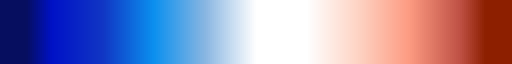

In [49]:
my_gradient

In [50]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.07, name='shifted_68')

/scratch/slurm_tmpdir/job_23219242/ipykernel_13696/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


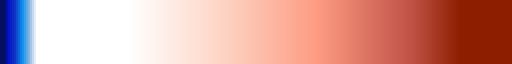

In [133]:
shifted_cmap

In [37]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

cmap=plt.get_cmap('RdYlBu')
RdYlBu_1 = shiftedColorMap(cmap, midpoint=0.05, name='shifted_9')

/scratch/slurm_tmpdir/job_23582787/ipykernel_42505/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [78]:
from matplotlib import colors
norm = colors.TwoSlopeNorm(vmin=-0.0008, vcenter=0, vmax=0.0028)

In [45]:
ds_fcnv2_ec_cf_sh_landbox_0616_mean.plev

<xarray.DataArray 'plev' (plev: 13)>
array([  5000.,  10000.,  15000.,  20000.,  25000.,  30000.,  40000.,  50000.,
        60000.,  70000.,  85000.,  92500., 100000.])
Coordinates:
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05
Attributes:
    standard_name:  air_pressure
    units:          Pa
    positive:       down
    axis:           Z

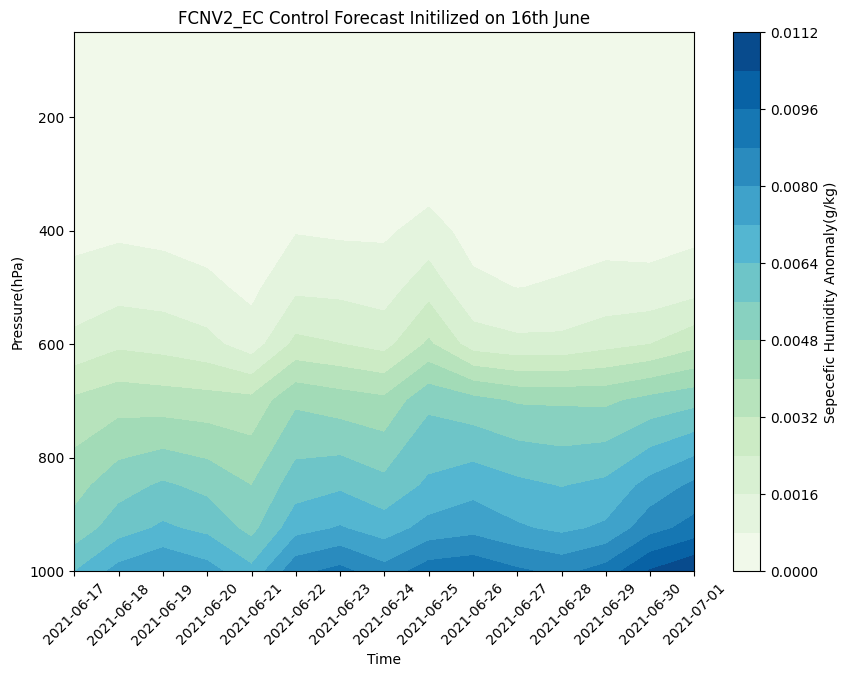

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 7))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0616_mean.time[3:60:4] # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0616_mean.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0616_mean[3:60:4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 16th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

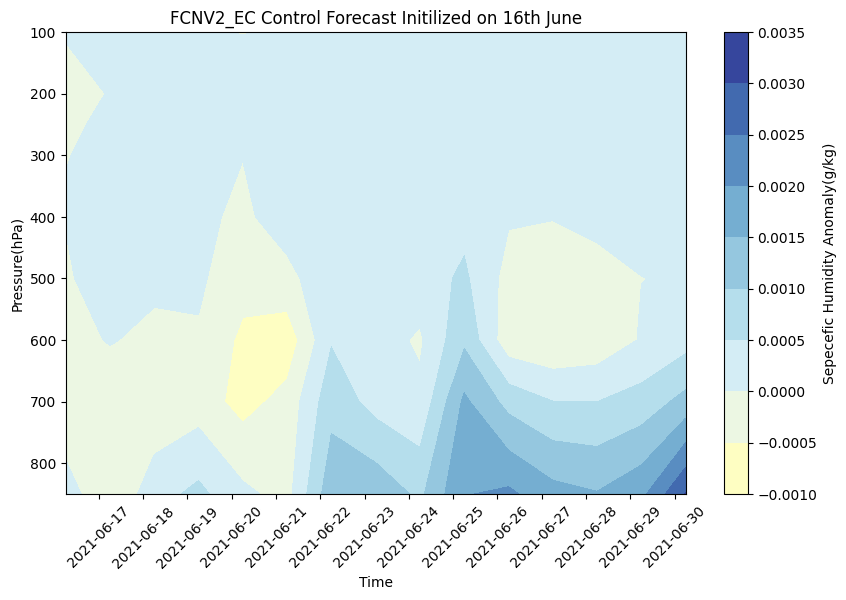

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.time[::4] # datetime array
levels = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu_1)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 16th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

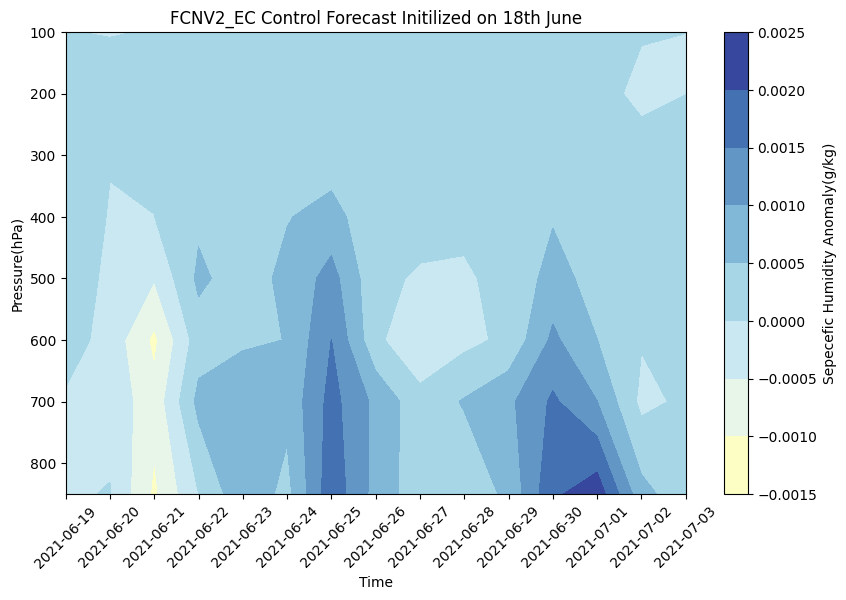

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.time[3:60:4] # datetime array
levels = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean[3:60:4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu_1)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 18th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

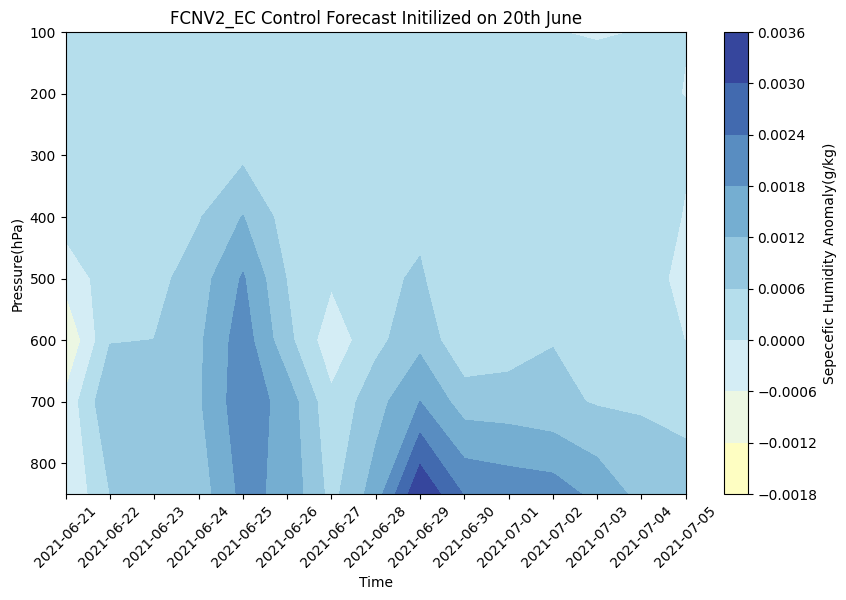

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.time[3:60:4]  # datetime array
levels = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean[3:60:4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu_1)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 20th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

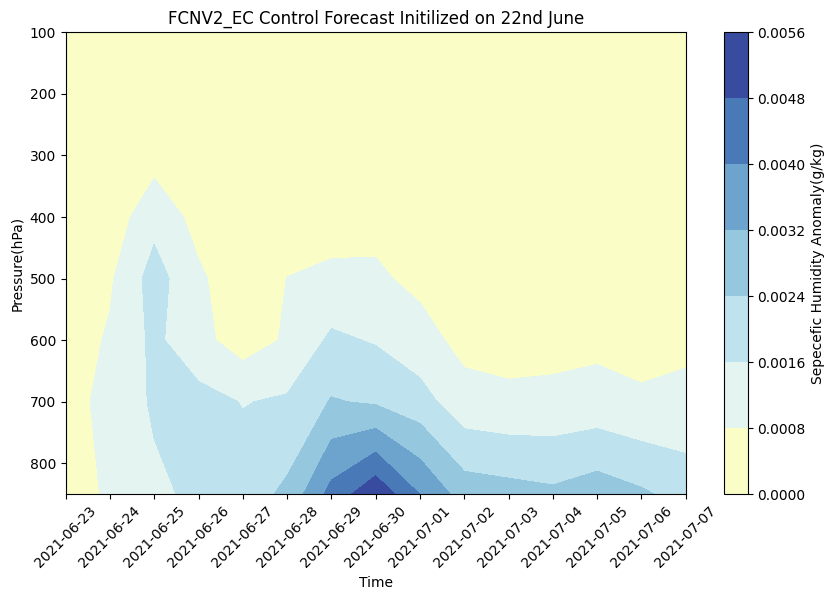

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.time[3:60:4]  # datetime array
levels = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean[3:60:4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu_1)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 22nd June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

NameError: name 'ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean' is not defined

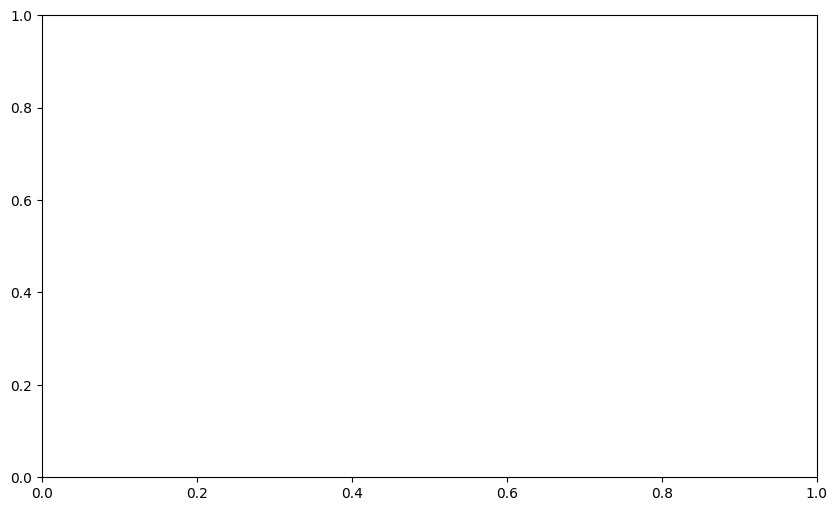

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean.time[3:60:4]  # datetime array
levels = ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean[3:60:4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 23rd June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

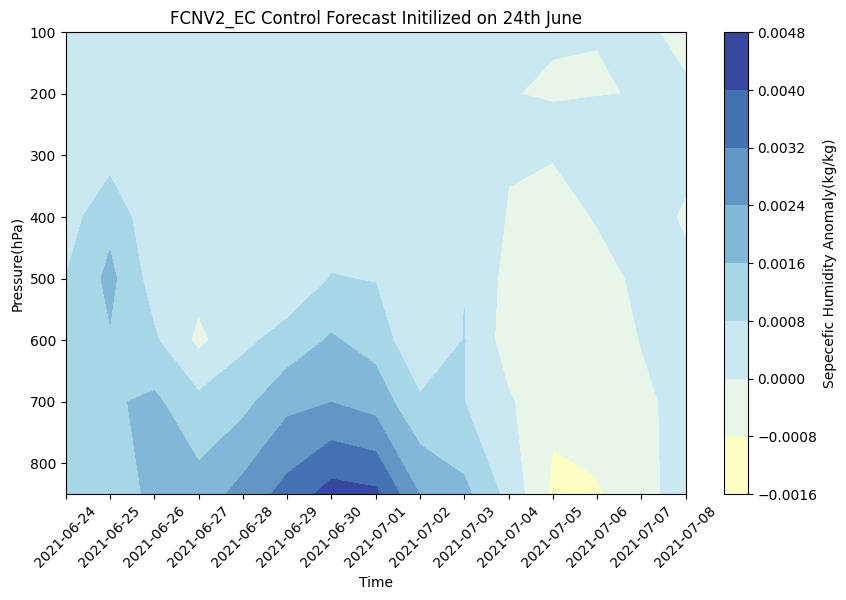

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean.time[3:60:4]  # datetime array
levels = ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean[3:60:4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap=RdYlBu_1)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity Anomaly(kg/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 24th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [40]:
%store ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean

Stored 'ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean' (DataArray)


In [68]:
ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.time[3:37:4]

<xarray.DataArray 'time' (time: 9)>
array(['2021-06-23T00:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-06-26T00:00:00.000000000',
       '2021-06-27T00:00:00.000000000', '2021-06-28T00:00:00.000000000',
       '2021-06-29T00:00:00.000000000', '2021-06-30T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-23 2021-06-24 ... 2021-07-01
Attributes:
    standard_name:  time
    axis:           T

In [72]:
ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean.time[3:33:4]

<xarray.DataArray 'time' (time: 8)>
array(['2021-06-24T00:00:00.000000000', '2021-06-25T00:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-25 ... 2021-07-01
Attributes:
    standard_name:  time
    axis:           T

In [126]:
#################################################  panel plots ##########################################################################

In [216]:
ds_fcnv2_ec_cf_sh_landbox_0623_mean[3:60:4].time

<xarray.DataArray 'time' (time: 15)>
array(['2021-06-24T00:00:00.000000000', '2021-06-25T00:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-03T00:00:00.000000000',
       '2021-07-04T00:00:00.000000000', '2021-07-05T00:00:00.000000000',
       '2021-07-06T00:00:00.000000000', '2021-07-07T00:00:00.000000000',
       '2021-07-08T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-06-24 2021-06-25 ... 2021-07-08
Attributes:
    standard_name:  time
    axis:           T

In [42]:
ds_fcnv2_ec_cf_sh_landbox_0620_mean

<xarray.DataArray (time: 60, plev: 13)>
<Quantity([[5.02979179e-06 4.20890010e-06 7.50992974e-06 2.95162483e-05
  7.04898156e-05 1.30663100e-04 3.37339977e-04 6.55823084e-04
  1.45675594e-03 3.11507559e-03 5.73116240e-03 7.55952356e-03
  9.89428392e-03]
 [4.87674601e-06 4.13012968e-06 9.06899427e-06 3.88255470e-05
  9.05731315e-05 1.62990819e-04 3.14231353e-04 4.65146413e-04
  9.85868236e-04 2.64988496e-03 5.45060573e-03 7.65348676e-03
  1.01664085e-02]
 [4.56293175e-06 4.10205711e-06 9.94747115e-06 4.74788442e-05
  1.15364719e-04 2.26671792e-04 4.41944433e-04 4.55278421e-04
  7.99823800e-04 2.53726621e-03 5.09030784e-03 5.71396408e-03
  6.70779652e-03]
 [4.44557663e-06 4.44733507e-06 1.02191516e-05 5.69911129e-05
  1.51438269e-04 3.31058759e-04 7.11415619e-04 6.02089235e-04
  8.32716517e-04 3.27826438e-03 4.93050824e-03 5.56532948e-03
  6.71850994e-03]
 [4.54541835e-06 5.01847894e-06 9.47611852e-06 5.79143186e-05
  1.65526605e-04 4.08413624e-04 1.13516506e-03 1.11704921e-03
  9.47214763e-04 3.28650713e-03 5.64780537e-03 8.38234294e-03
  1.13776925e-02]
...
 [5.22844984e-06 2.94915426e-06 6.40467155e-06 3.25650441e-05
  1.10439783e-04 2.47006715e-04 6.18356054e-04 1.15762480e-03
  2.25627137e-03 4.25982863e-03 6.55187748e-03 7.54073787e-03
  9.11106359e-03]
 [5.36179687e-06 3.48131205e-06 6.48858334e-06 2.80416280e-05
  9.69568986e-05 2.32695618e-04 6.32366794e-04 1.21628146e-03
  2.31449196e-03 4.29673834e-03 7.25503460e-03 1.00580624e-02
  1.26541607e-02]
 [5.11176486e-06 3.95501000e-06 6.08777738e-06 2.14662656e-05
  7.36996313e-05 1.87885263e-04 5.63784909e-04 1.18083760e-03
  2.30708929e-03 4.21199614e-03 7.34842746e-03 1.01566269e-02
  1.26692976e-02]
 [5.54317551e-06 4.02222535e-06 5.42219551e-06 1.70872949e-05
  6.02005579e-05 1.55391255e-04 4.47025573e-04 1.00440050e-03
  2.09787793e-03 4.11372962e-03 6.76143595e-03 8.00438228e-03
  9.62130435e-03]
 [5.69555853e-06 4.14082503e-06 4.81478459e-06 1.48416005e-05
  6.31449493e-05 1.57708655e-04 4.34269012e-04 9.24212768e-04
  2.03998202e-03 4.09015524e-03 6.50899453e-03 7.75204236e-03
  9.34881054e-03]], 'dimensionless')>
Coordinates:
  * time     (time) datetime64[ns] 2021-06-20T06:00:00 ... 2021-07-05
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05

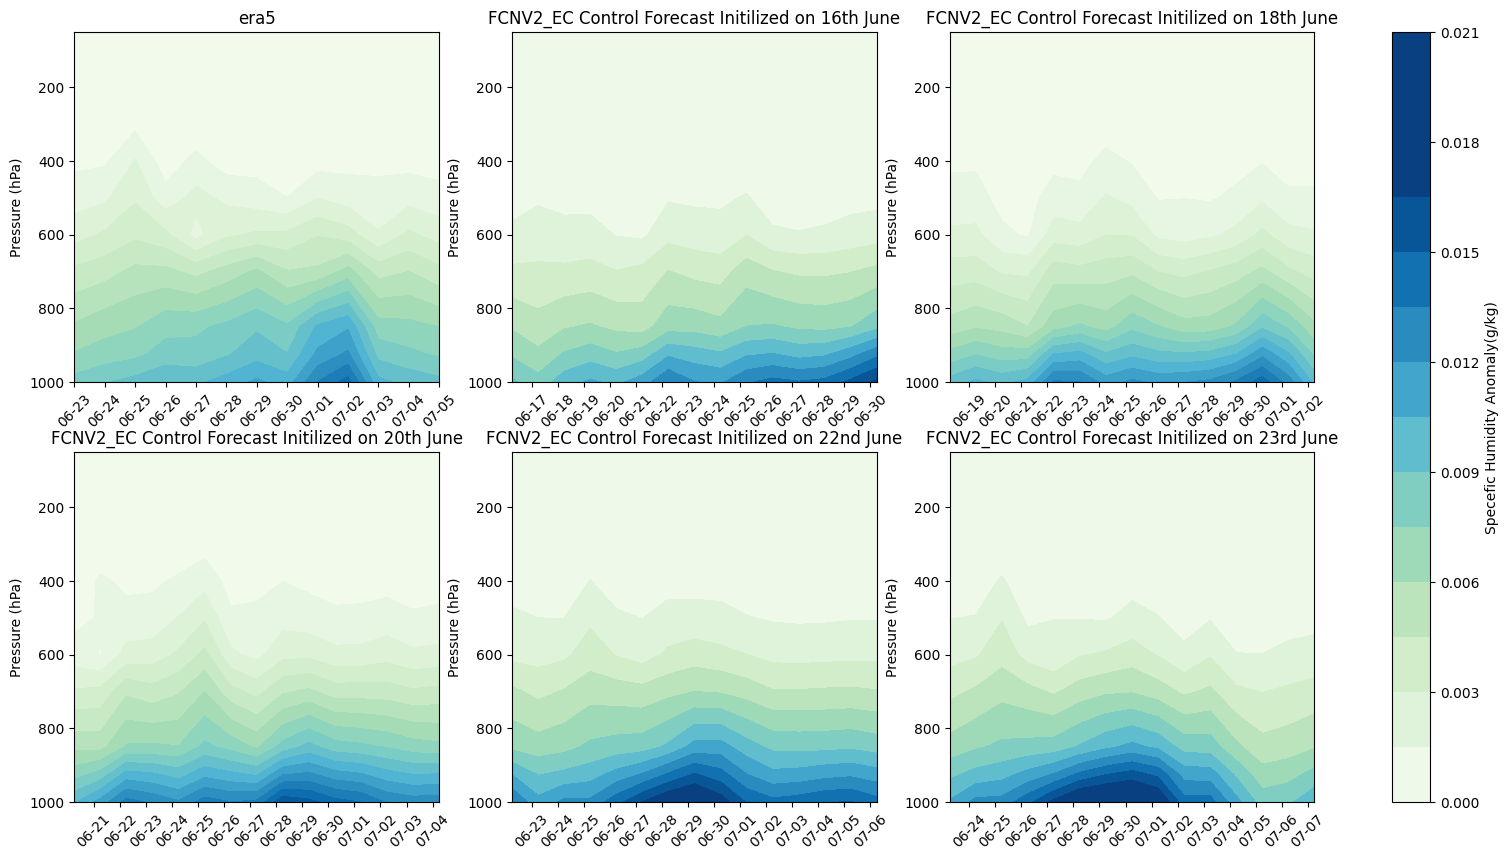

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib import colors
# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
# Adjust these datasets according to your actual data

# Subplot 1 data
times_1 = ds_era5_JJ_sh_landbox_mean.time[9:22]  # datetime array for subplot 1
levels_1 = ds_era5_JJ_sh_landbox_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_1, Y_1 = np.meshgrid(mdates.date2num(times_1), levels_1)
Z_1 = ds_era5_JJ_sh_landbox_mean[9:22, :].T  # Data array for subplot 1

times_2 = ds_fcnv2_ec_cf_sh_landbox_0616_mean.time[::4]  # datetime array for subplot 1
levels_2 = ds_fcnv2_ec_cf_sh_landbox_0616_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_2, Y_2 = np.meshgrid(mdates.date2num(times_2), levels_2)
Z_2 = ds_fcnv2_ec_cf_sh_landbox_0616_mean[::4, :].T  # Data array for subplot 1

times_3 = ds_fcnv2_ec_cf_sh_landbox_0618_mean.time[::4]  # datetime array for subplot 1
levels_3 = ds_fcnv2_ec_cf_sh_landbox_0618_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_3, Y_3 = np.meshgrid(mdates.date2num(times_3), levels_3)
Z_3 = ds_fcnv2_ec_cf_sh_landbox_0618_mean[::4, :].T  # Data array for subplot 1

times_4 = ds_fcnv2_ec_cf_sh_landbox_0620_mean.time[::4]  # datetime array for subplot 1
levels_4 = ds_fcnv2_ec_cf_sh_landbox_0620_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_4, Y_4 = np.meshgrid(mdates.date2num(times_4), levels_4)
Z_4 = ds_fcnv2_ec_cf_sh_landbox_0620_mean[::4, :].T  # Data array for subplot 1

times_5 = ds_fcnv2_ec_cf_sh_landbox_0622_mean.time[::4]  # datetime array for subplot 1
levels_5 = ds_fcnv2_ec_cf_sh_landbox_0622_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_5, Y_5 = np.meshgrid(mdates.date2num(times_5), levels_5)
Z_5 = ds_fcnv2_ec_cf_sh_landbox_0622_mean[::4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

times_6 = ds_fcnv2_ec_cf_sh_landbox_0623_mean.time[::4]  # datetime array for subplot 1
levels_6 = ds_fcnv2_ec_cf_sh_landbox_0623_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_6, Y_6 = np.meshgrid(mdates.date2num(times_6), levels_6)
Z_6 = ds_fcnv2_ec_cf_sh_landbox_0623_mean[::4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

#cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])  # Define colorbar axes position
vmin = np.min([np.min(Z_1), np.min(Z_2), np.min(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed
vmax = np.max([np.max(Z_1), np.max(Z_2), np.max(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed

# Create the panel plot
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    # Plot data on each subplot
    if i == 0:
        X, Y, Z = X_1, Y_1, Z_1
        title='era5'
    # Define X, Y, Z for other subplots similarly
    elif i == 1:
        X, Y, Z = X_2, Y_2, Z_2
        title='FCNV2_EC Control Forecast Initilized on 16th June'
    elif i == 2:
        X, Y, Z = X_3, Y_3, Z_3
        title='FCNV2_EC Control Forecast Initilized on 18th June'
    elif i == 3:
        X, Y, Z = X_4, Y_4, Z_4
        title='FCNV2_EC Control Forecast Initilized on 20th June'
    elif i == 4:
        X, Y, Z = X_5, Y_5, Z_5
        title='FCNV2_EC Control Forecast Initilized on 22nd June'
    elif i == 5:
        X, Y, Z = X_6, Y_6, Z_6
        title='FCNV2_EC Control Forecast Initilized on 23rd June'
        
    # Repeat for the remaining subplots
    
    c = ax.contourf(X, Y, Z, cmap='GnBu', vmin = vmin, vmax = vmax,levels=15)

    # Add color bar
   
    #cbar = fig.colorbar(c)



    # Set x-axis major locator and formatter for dates
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Labels and title
   # ax.set_xlabel('Time')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(f'{title}')
    ax.invert_yaxis()
    # Rotate date labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cbar = fig.colorbar(c,ax=axs, orientation='vertical',pad=0.05,norm=norm,label='Specefic Humidity Anomaly(g/kg)')
#cbar.set_label('Specific Humidity Anomaly (g/kg)')
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/sh_panel_6.png', bbox_inches='tight',dpi=200)
#plt.tight_layout()
plt.show()

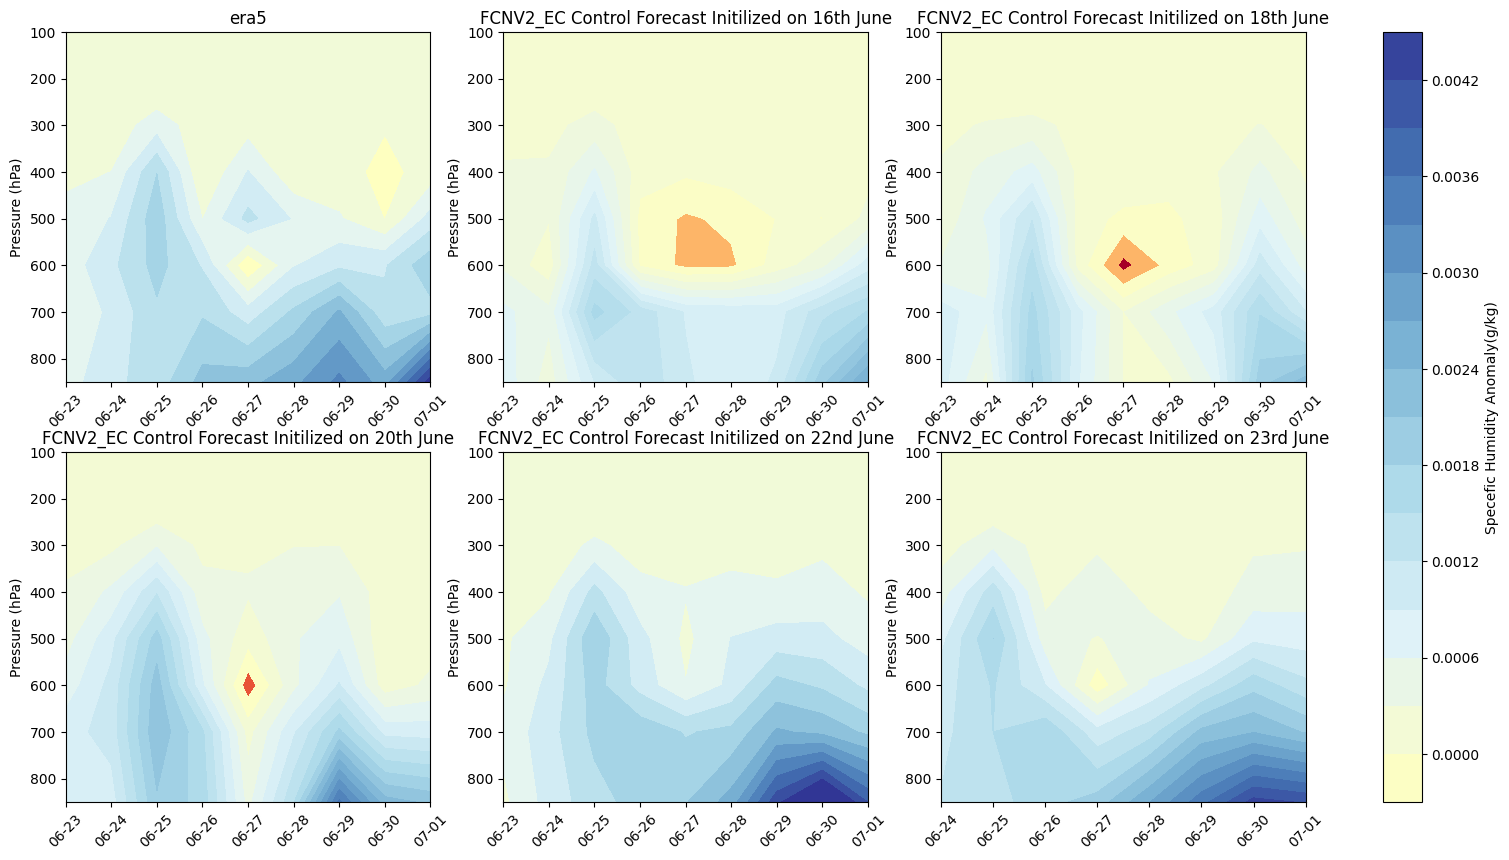

In [219]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib import colors
# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
# Adjust these datasets according to your actual data

# Subplot 1 data
times_1 = ds_anomaly_Q_L9_landbox_mean.time[9:18]  # datetime array for subplot 1
levels_1 = ds_anomaly_Q_L9_landbox_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_1, Y_1 = np.meshgrid(mdates.date2num(times_1), levels_1)
Z_1 = ds_anomaly_Q_L9_landbox_mean[9:18, :].T  # Data array for subplot 1

times_2 = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.time[4:37:4]  # datetime array for subplot 1
levels_2 = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_2, Y_2 = np.meshgrid(mdates.date2num(times_2), levels_2)
Z_2 = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean[4:37:4, :].T  # Data array for subplot 1

times_3 = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.time[4:37:4]  # datetime array for subplot 1
levels_3 = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_3, Y_3 = np.meshgrid(mdates.date2num(times_3), levels_3)
Z_3 = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean[4:37:4, :].T  # Data array for subplot 1

times_4 = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.time[4:37:4]  # datetime array for subplot 1
levels_4 = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_4, Y_4 = np.meshgrid(mdates.date2num(times_4), levels_4)
Z_4 = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean[4:37:4, :].T  # Data array for subplot 1

times_5 = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.time[3:37:4]  # datetime array for subplot 1
levels_5 = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_5, Y_5 = np.meshgrid(mdates.date2num(times_5), levels_5)
Z_5 = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean[3:37:4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

times_6 = ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean.time[3:33:4]  # datetime array for subplot 1
levels_6 = ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_6, Y_6 = np.meshgrid(mdates.date2num(times_6), levels_6)
Z_6 = ds_anomaly_fcnv2_ec_cf_Q_L9_0623_mean[3:33:4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

#cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])  # Define colorbar axes position
vmin = np.min([np.min(Z_1), np.min(Z_2), np.min(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed
vmax = np.max([np.max(Z_1), np.max(Z_2), np.max(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed

# Create the panel plot
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    # Plot data on each subplot
    if i == 0:
        X, Y, Z = X_1, Y_1, Z_1
        title='era5'
    # Define X, Y, Z for other subplots similarly
    elif i == 1:
        X, Y, Z = X_2, Y_2, Z_2
        title='FCNV2_EC Control Forecast Initilized on 16th June'
    elif i == 2:
        X, Y, Z = X_3, Y_3, Z_3
        title='FCNV2_EC Control Forecast Initilized on 18th June'
    elif i == 3:
        X, Y, Z = X_4, Y_4, Z_4
        title='FCNV2_EC Control Forecast Initilized on 20th June'
    elif i == 4:
        X, Y, Z = X_5, Y_5, Z_5
        title='FCNV2_EC Control Forecast Initilized on 22nd June'
    elif i == 5:
        X, Y, Z = X_6, Y_6, Z_6
        title='FCNV2_EC Control Forecast Initilized on 23rd June'
        
    # Repeat for the remaining subplots
    
    c = ax.contourf(X, Y, Z, cmap=RdYlBu_1, vmin = vmin, vmax = vmax,levels=15)

    # Add color bar
   
    #cbar = fig.colorbar(c)



    # Set x-axis major locator and formatter for dates
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Labels and title
   # ax.set_xlabel('Time')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(f'{title}')
    ax.invert_yaxis()
    # Rotate date labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cbar = fig.colorbar(c,ax=axs, orientation='vertical',pad=0.05,norm=norm,label='Specefic Humidity Anomaly(g/kg)')
#cbar.set_label('Specific Humidity Anomaly (g/kg)')
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/sh_panel_6_anomaly.png', bbox_inches='tight',dpi=200)
#plt.tight_layout()
plt.show()

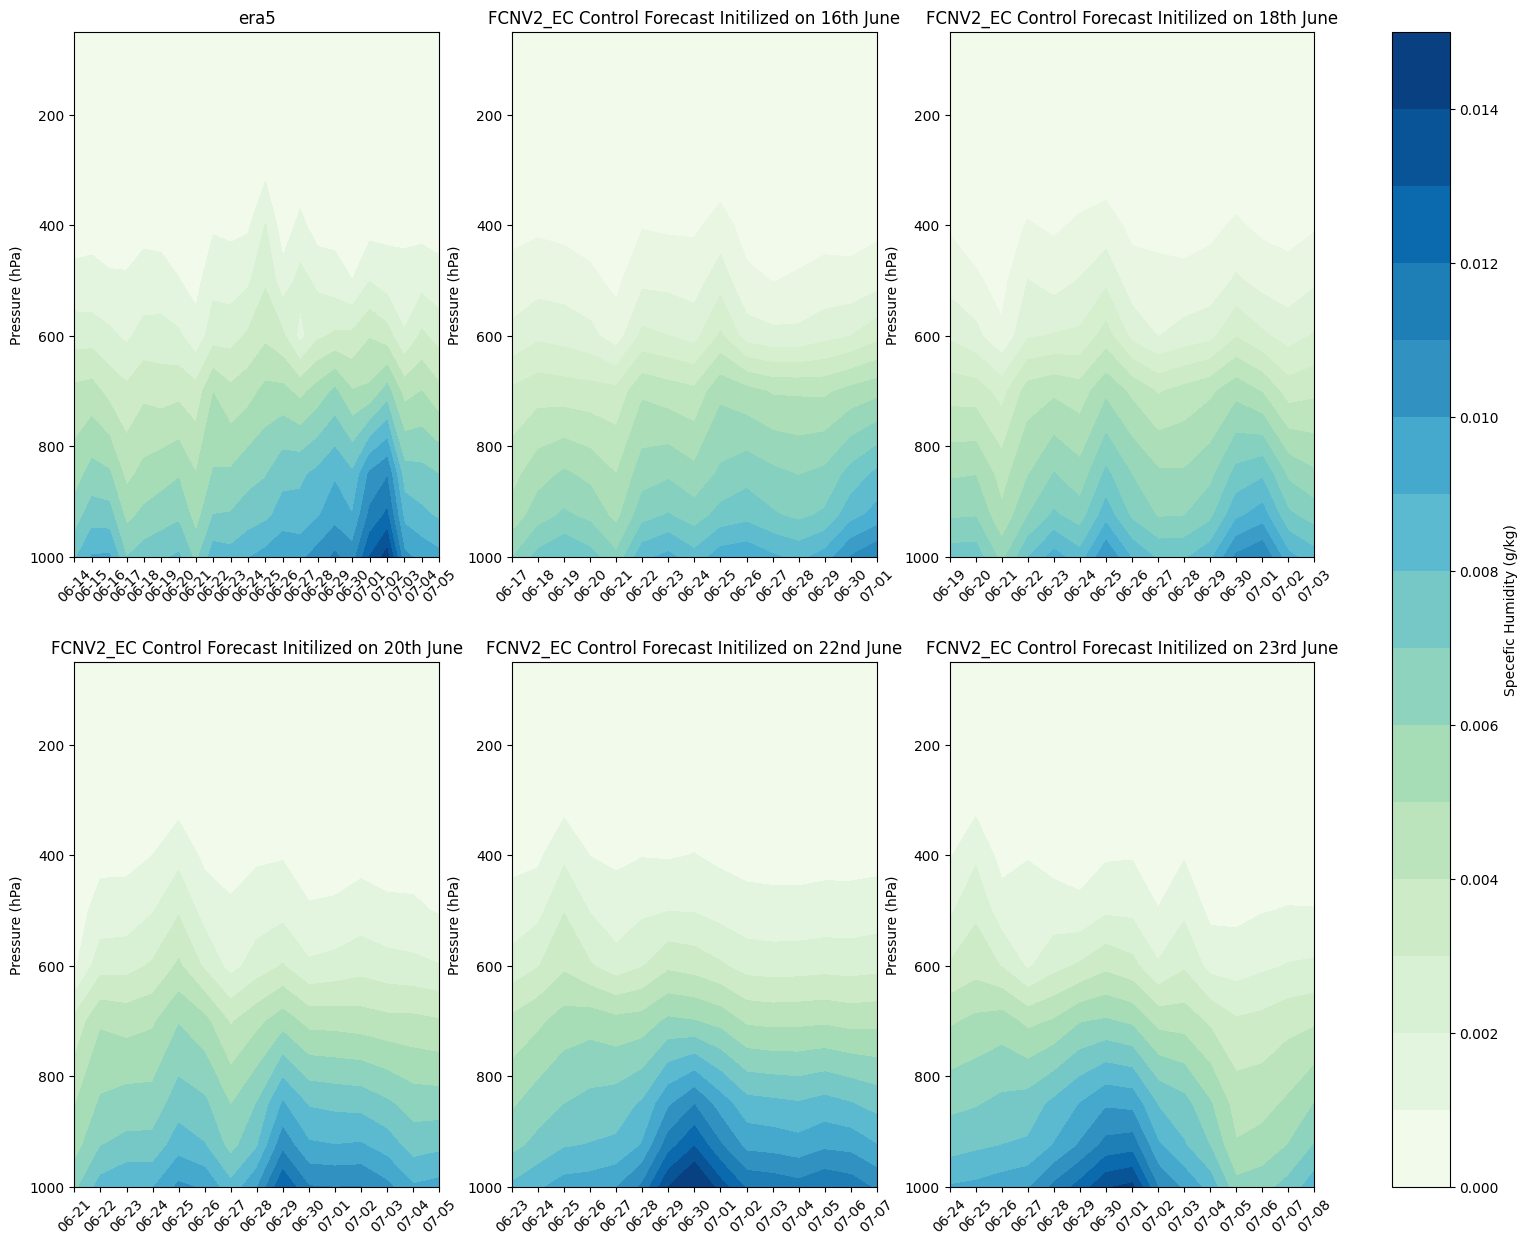

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib import colors
# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
# Adjust these datasets according to your actual data

# Subplot 1 data
times_1 = ds_era5_JJ_sh_landbox_mean.time[:]  # datetime array for subplot 1
levels_1 = ds_era5_JJ_sh_landbox_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_1, Y_1 = np.meshgrid(mdates.date2num(times_1), levels_1)
Z_1 = ds_era5_JJ_sh_landbox_mean[:, :].T  # Data array for subplot 1

times_2 = ds_fcnv2_ec_cf_sh_landbox_0616_mean.time[3:60:4]  # datetime array for subplot 1
levels_2 = ds_fcnv2_ec_cf_sh_landbox_0616_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_2, Y_2 = np.meshgrid(mdates.date2num(times_2), levels_2)
Z_2 = ds_fcnv2_ec_cf_sh_landbox_0616_mean[3:60:4, :].T  # Data array for subplot 1

times_3 = ds_fcnv2_ec_cf_sh_landbox_0618_mean.time[3:60:4]  # datetime array for subplot 1
levels_3 = ds_fcnv2_ec_cf_sh_landbox_0618_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_3, Y_3 = np.meshgrid(mdates.date2num(times_3), levels_3)
Z_3 = ds_fcnv2_ec_cf_sh_landbox_0618_mean[3:60:4, :].T  # Data array for subplot 1

times_4 = ds_fcnv2_ec_cf_sh_landbox_0620_mean.time[3:60:4]  # datetime array for subplot 1
levels_4 = ds_fcnv2_ec_cf_sh_landbox_0620_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_4, Y_4 = np.meshgrid(mdates.date2num(times_4), levels_4)
Z_4 = ds_fcnv2_ec_cf_sh_landbox_0620_mean[3:60:4, :].T  # Data array for subplot 1

times_5 = ds_fcnv2_ec_cf_sh_landbox_0622_mean.time[3:60:4]  # datetime array for subplot 1
levels_5 = ds_fcnv2_ec_cf_sh_landbox_0622_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_5, Y_5 = np.meshgrid(mdates.date2num(times_5), levels_5)
Z_5 = ds_fcnv2_ec_cf_sh_landbox_0622_mean[3:60:4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

times_6 = ds_fcnv2_ec_cf_sh_landbox_0623_mean.time[3:60:4]  # datetime array for subplot 1
levels_6 = ds_fcnv2_ec_cf_sh_landbox_0623_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_6, Y_6 = np.meshgrid(mdates.date2num(times_6), levels_6)
Z_6 = ds_fcnv2_ec_cf_sh_landbox_0623_mean[3:60:4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

#cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])  # Define colorbar axes position
vmin = np.min([np.min(Z_1), np.min(Z_2), np.min(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed
vmax = np.max([np.max(Z_1), np.max(Z_2), np.max(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed

# Create the panel plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

for i, ax in enumerate(axs.flat):
    # Plot data on each subplot
    if i == 0:
        X, Y, Z = X_1, Y_1, Z_1
        title='era5'
    # Define X, Y, Z for other subplots similarly
    elif i == 1:
        X, Y, Z = X_2, Y_2, Z_2
        title='FCNV2_EC Control Forecast Initilized on 16th June'
    elif i == 2:
        X, Y, Z = X_3, Y_3, Z_3
        title='FCNV2_EC Control Forecast Initilized on 18th June'
    elif i == 3:
        X, Y, Z = X_4, Y_4, Z_4
        title='FCNV2_EC Control Forecast Initilized on 20th June'
    elif i == 4:
        X, Y, Z = X_5, Y_5, Z_5
        title='FCNV2_EC Control Forecast Initilized on 22nd June'
    elif i == 5:
        X, Y, Z = X_6, Y_6, Z_6
        title='FCNV2_EC Control Forecast Initilized on 23rd June'
        
    # Repeat for the remaining subplots
    
    c = ax.contourf(X, Y, Z, cmap='GnBu', vmin = vmin, vmax = vmax,levels=15)

    # Add color bar
   
    #cbar = fig.colorbar(c)



    # Set x-axis major locator and formatter for dates
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Labels and title
   # ax.set_xlabel('Time')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(f'{title}')
    ax.invert_yaxis()
    # Rotate date labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cbar = fig.colorbar(c,ax=axs, orientation='vertical',pad=0.05,norm=norm,label='Specefic Humidity (g/kg)')
#cbar.set_label('Specific Humidity Anomaly (g/kg)')
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/sh_panel_6_full.png', bbox_inches='tight',dpi=200)
#plt.tight_layout()
plt.show()

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib import colors
# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
# Adjust these datasets according to your actual data

# Subplot 1 data
times_1 = ds_anomaly_Q_L9_landbox_mean.time[:]  # datetime array for subplot 1
levels_1 = ds_anomaly_Q_L9_landbox_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_1, Y_1 = np.meshgrid(mdates.date2num(times_1), levels_1)
Z_1 = ds_anomaly_Q_L9_landbox_mean[:, :].T  # Data array for subplot 1

times_2 = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.time[3:60:4]  # datetime array for subplot 1
levels_2 = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_2, Y_2 = np.meshgrid(mdates.date2num(times_2), levels_2)
Z_2 = ds_anomaly_fcnv2_ec_cf_Q_L9_0616_mean[3:60:4, :].T  # Data array for subplot 1

times_3 = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.time[3:60:4]  # datetime array for subplot 1
levels_3 = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_3, Y_3 = np.meshgrid(mdates.date2num(times_3), levels_3)
Z_3 = ds_anomaly_fcnv2_ec_cf_Q_L9_0618_mean[3:60:4, :].T  # Data array for subplot 1

times_4 = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.time[3:60:4]  # datetime array for subplot 1
levels_4 = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_4, Y_4 = np.meshgrid(mdates.date2num(times_4), levels_4)
Z_4 = ds_anomaly_fcnv2_ec_cf_Q_L9_0620_mean[3:60:4, :].T  # Data array for subplot 1

times_5 = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.time[3:60:4]  # datetime array for subplot 1
levels_5 = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_5, Y_5 = np.meshgrid(mdates.date2num(times_5), levels_5)
Z_5 = ds_anomaly_fcnv2_ec_cf_Q_L9_0622_mean[3:60:4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

times_6 = ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean.time[3:60:4]  # datetime array for subplot 1
levels_6 = ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean.plev[:] / 100  # vertical levels array for subplot 1, inverted if needed
X_6, Y_6 = np.meshgrid(mdates.date2num(times_6), levels_6)
Z_6 = ds_anomaly_fcnv2_ec_cf_Q_L9_0624_mean[3:60:4, :].T  # Data array for subplot 1
# Repeat the process for the rest of the subplots, adjusting data accordingly

#cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])  # Define colorbar axes position
vmin = np.min([np.min(Z_1), np.min(Z_2), np.min(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed
vmax = np.max([np.max(Z_1), np.max(Z_2), np.max(Z_3),np.min(Z_4),np.min(Z_5),np.min(Z_6)])  # Adjust as needed

# Create the panel plot
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

for i, ax in enumerate(axs.flat):
    # Plot data on each subplot
    if i == 0:
        X, Y, Z = X_1, Y_1, Z_1
        title='era5'
    # Define X, Y, Z for other subplots similarly
    elif i == 1:
        X, Y, Z = X_2, Y_2, Z_2
        title='FCNV2_EC Control Forecast Initilized on 16th June'
    elif i == 2:
        X, Y, Z = X_3, Y_3, Z_3
        title='FCNV2_EC Control Forecast Initilized on 18th June'
    elif i == 3:
        X, Y, Z = X_4, Y_4, Z_4
        title='FCNV2_EC Control Forecast Initilized on 20th June'
    elif i == 4:
        X, Y, Z = X_5, Y_5, Z_5
        title='FCNV2_EC Control Forecast Initilized on 22nd June'
    elif i == 5:
        X, Y, Z = X_6, Y_6, Z_6
        title='FCNV2_EC Control Forecast Initilized on 23rd June'
        
    # Repeat for the remaining subplots
    
    c = ax.contourf(X, Y, Z, cmap=RdYlBu_1, vmin = vmin, vmax = vmax,levels=15)

    # Add color bar
   
    #cbar = fig.colorbar(c)



    # Set x-axis major locator and formatter for dates
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Labels and title
   # ax.set_xlabel('Time')
    ax.set_ylabel('Pressure (hPa)')
    ax.set_title(f'{title}')
    ax.invert_yaxis()
    # Rotate date labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cbar = fig.colorbar(c,ax=axs, orientation='vertical',pad=0.05,norm=norm,label='Specefic Humidity Anomaly(g/kg)')
#cbar.set_label('Specific Humidity Anomaly (g/kg)')
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/sh_panel_6_anomaly_full.png', bbox_inches='tight',dpi=200)
#plt.tight_layout()
plt.show()

NameError: name 'ds_anomaly_Q_L9_landbox_mean' is not defined

In [ ]:
######################################## sh time evolution-vertical profile ######################################################################

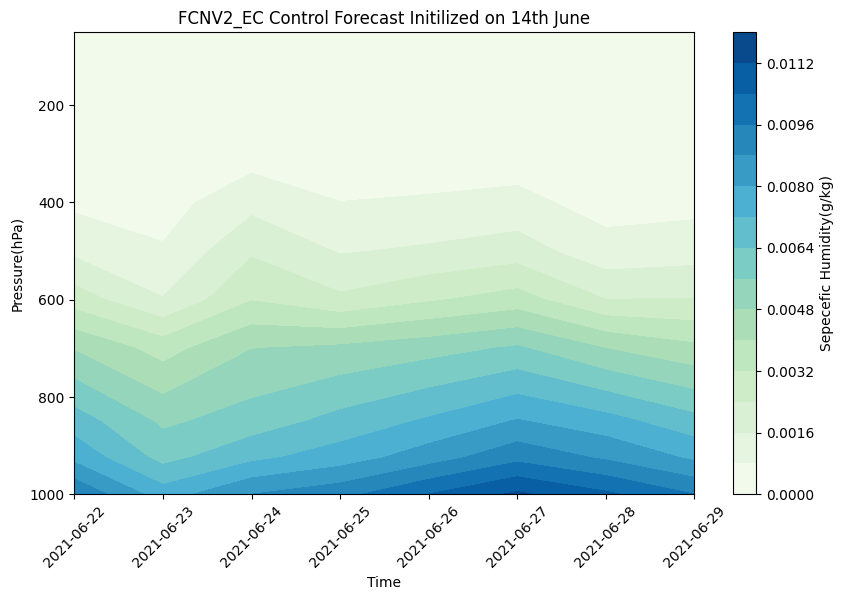

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0614_mean.time[::4]  # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0614_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0614_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 14th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

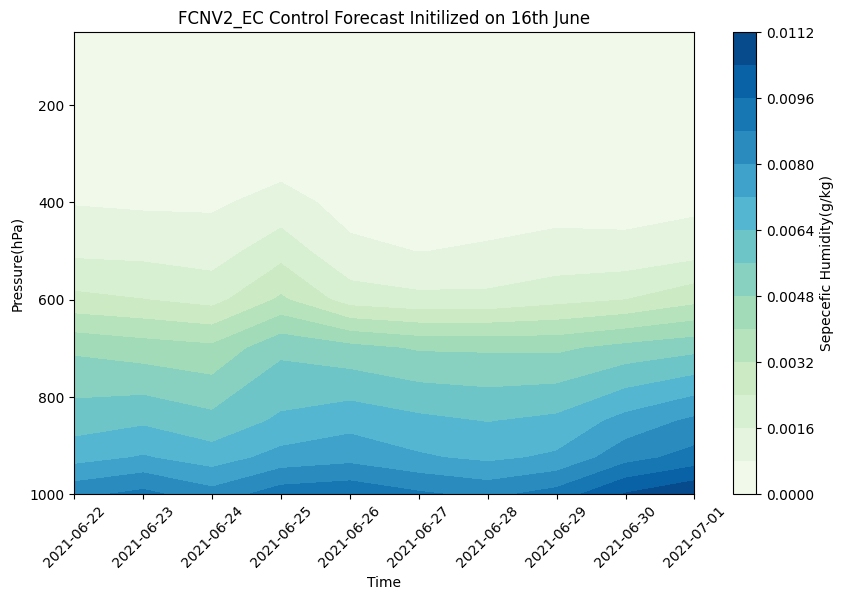

In [76]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0616_mean.time[::4]  # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0616_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0616_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 16th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

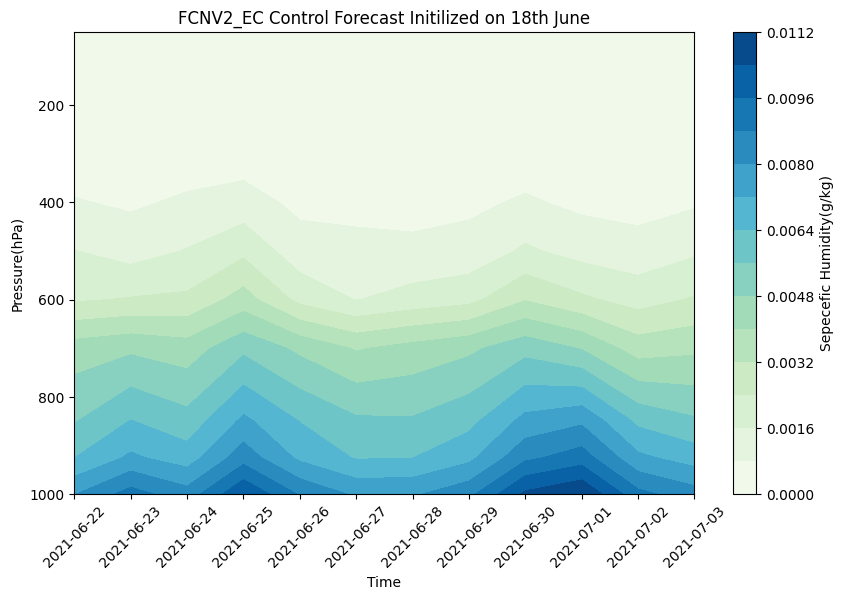

In [78]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0618_mean.time[::4]  # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0618_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0618_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 18th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

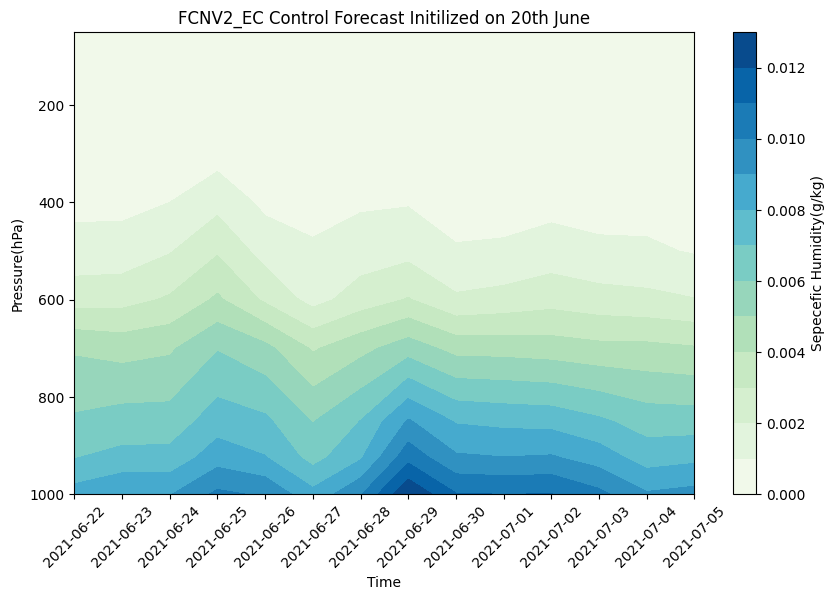

In [79]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0620_mean.time[::4]  # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0620_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0620_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 20th June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

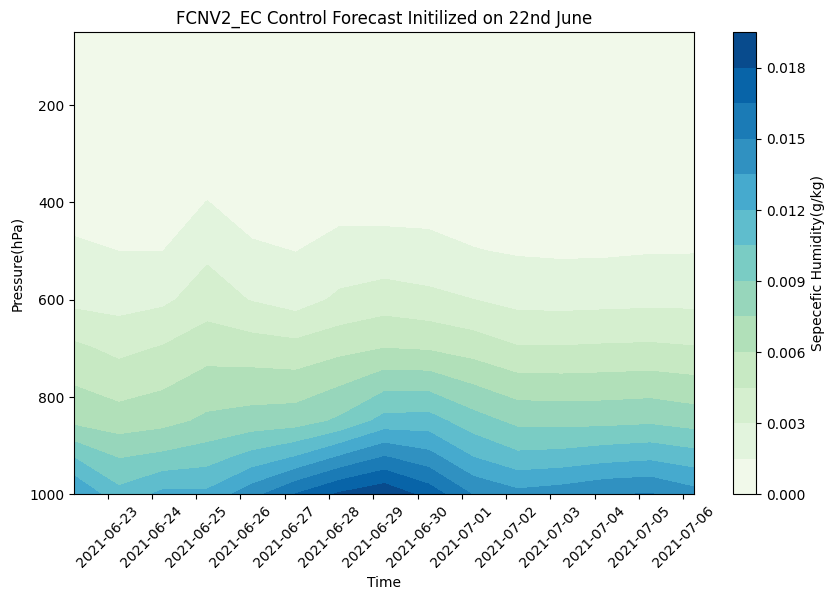

In [80]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0622_mean.time[::4]  # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0622_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0622_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 22nd June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

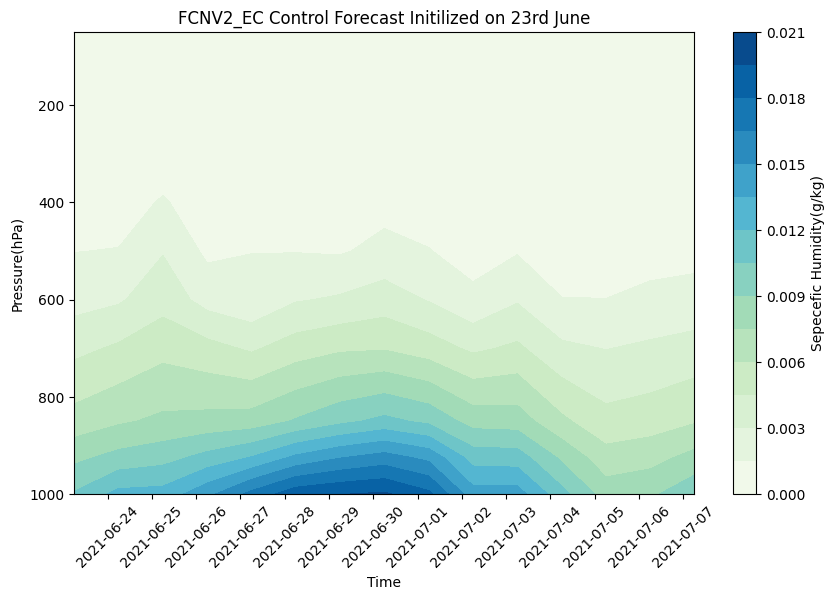

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times = ds_fcnv2_ec_cf_sh_landbox_0623_mean.time[::4]  # datetime array
levels = ds_fcnv2_ec_cf_sh_landbox_0623_mean.plev[:]/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_fcnv2_ec_cf_sh_landbox_0623_mean[::4, :].T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Sepecefic Humidity(g/kg)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('FCNV2_EC Control Forecast Initilized on 23rd June')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()